# SD202 TP3 - Views, Updates and Database Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a marketplace


For the first 2 parts we will use the _wine_ database and the Tables created in TP2.

A reminder of the wine database schema:

In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)


Again, we recommend inline %sql as an alternative to the sqlite3 package

In [4]:
%load_ext sql
%sql sqlite:///wine.db

Recreate the Tables in 3NF/BCNF from Master2 as you did in the TP2

In [5]:
# Write corresponding code here

%sql CREATE TABLE M2 AS \
SELECT DISTINCT NV, NB, DATES, LIEU, QTE \
    FROM MASTER2;

%sql CREATE TABLE BUVEUR AS \
SELECT DISTINCT NB, NOM, PRENOM, TYPE \
    FROM MASTER2;
    
%sql CREATE TABLE LOCATION AS \
SELECT DISTINCT LIEU, REGION \
    FROM MASTER2;

%sql CREATE TABLE WINE2 AS \
SELECT DISTINCT NV, CRU, MILL, DEGRE \
    FROM MASTER2;
    
print("\nContent of the database")
printSchema(conn)

print("\nContent of M2")
%sql SELECT * FROM M2

print("\nContent of BUVEUR")
%sql SELECT * FROM BUVEUR

print("\nContent of LOCATION")
%sql SELECT * FROM LOCATION

print("\nContent of WINE2")
%sql SELECT * FROM WINE2
    

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.

Content of the database
BUVEUR:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
LOCATION:
  0: LIEU(TEXT)
  1: REGION(TEXT)
M2:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
WINE2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: MILL(NUM)
  3: DEGRE(NUM)

Content of M2
 * sqlite:///wine.db
Done.

Content of BUVEUR
 * sqlite:///wine.db
Done.

Content of LOCATION
 * sqlite:///wine.db
Done.

Content of WINE2
 * sqlite:///wine.db
Done.


NV,CRU,MILL,DEGRE
None,None,None,None
1,Mercurey,1980,11.5
2,Julienas,1974,11.3
3,Savigny les Beaunes,1978,12.1
4,Mercurey,1980,10.9
5,Pommard,1976,11.7
6,Mercurey,1981,11.2
7,Grands Echezeaux,1968,11.7
8,Cotes de Beaune Villages,1975,12.3
9,Chapelle Chambertin,1973,11.9


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```sql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command is:

```sql
DROP VIEW IF EXISTS view_name;
```


__Note:__ Use it with caution (only drop something if you are sure)

__1.1__ Create a view 'bons_buveurs' with the clients (buveurs) of type 'gros' or 'moyen'.

In [6]:
%sql CREATE VIEW bons_buveurs AS \
    SELECT NB, NOM, PRENOM, TYPE \
        FROM BUVEUR \
            WHERE TYPE = 'gros' or TYPE = 'moyen';

 * sqlite:///wine.db
Done.


[]

In [7]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__1.2__ Create the view 'buveurs_asec' with clients (buveurs) who have not bought any wine.

In [12]:
%sql CREATE VIEW buveurs_asec AS \
    SELECT NB, NOM, PRENOM, TYPE \
        FROM BUVEUR NATURAL JOIN M2 \
            WHERE QTE = 0 or QTE IS NULL;

 * sqlite:///wine.db
Done.


[]

In [13]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__1.3__ Create the view 'buveurs_achats' complementary to the previous one.

In [19]:
%sql CREATE VIEW buveurs_achats AS \
    SELECT DISTINCT NB, NOM, PRENOM, TYPE \
        FROM BUVEUR NATURAL JOIN M2 \
            WHERE QTE > 0;

 * sqlite:///wine.db
Done.


[]

In [20]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


__1.4__ Create the view 'q83pl' (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [26]:
%sql DROP VIEW q83pl;
%sql CREATE view q83pl AS \
    SELECT LIEU, CRU,  sum(QTE) as QTE_BUE \
        FROM M2 NATURAL JOIN WINE2 \
            WHERE DATES LIKE '%1983%' \
            	GROUP BY CRU \
                	HAVING QTE_BUE > 0

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [28]:
# Test
%sql SELECT * FROM q83pl ORDER by QTE_BUE DESC;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
LYON,Beaujolais Villages,270
ROCQUENCOURT,Saint Amour,80
LILLE,Pommard,5
PARIS,Beaujolais Primeur,4
PARIS,Pouilly Vinzelles,3
CAEN,Seyssel,3
LYON,Julienas,2
PARIS,Coteaux du Tricastin,1
RENNES,Mercurey,1


__1.5__ Can we define the same view with ascending order over the attribute QTE? Provide an explanation for your answer.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the Update statement is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the Insert statement is:

```sql
INSERT INTO TABLE_NAME [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```


Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you may not execute a DELETE, INSERT or UPDATE statement on a view.

__2.1__ Create a table 'RBB' with the same schema as 'bons_buveurs' which contains the tuples selected from 'bons_buveurs'

In [38]:
%sql CREATE TABLE RBB AS \
    SELECT NB, NOM, PRENOM, TYPE \
        FROM BUVEUR \
            WHERE TYPE = 'gros' or TYPE = 'moyen' ORDER BY NB;
    
    

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.


[]

In [39]:
# Test
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__2.2__ Update the table you used to create 'bons_buveurs': Change the 'type' to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may be different from the one in your table)

In [49]:
%sql SELECT Buveur.NB, NOM, PRENOM, TYPE, SUM(QTE) AS qte_totale FROM Buveur \
JOIN M2 ON Buveur.NB = M2.NB GROUP BY Buveur.NB HAVING TYPE != 'gros' AND qte_totale > 100; 

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,qte_totale
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [54]:
%sql UPDATE BUVEUR \
SET TYPE = 'gros' \
WHERE NB IN (SELECT Buveur.NB AS qte_totale FROM Buveur \
JOIN M2 ON Buveur.NB = M2.NB GROUP BY Buveur.NB HAVING TYPE != 'gros' AND SUM(QTE) > 100);

 * sqlite:///wine.db
4 rows affected.


[]

__2.3__ Compare the content of _table_ 'RBB' and the _view_ 'bons_buveurs' after the update. What differences do you see? Explain

In [56]:
%sql SELECT * FROM bons_buveurs WHERE TYPE = 'gros';

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
18,Celine,Louis Ferdinand,gros
27,Dumas,Alexandre,gros
35,Fromentin,Eugene,gros
39,Montesquieu,None,gros
43,Musset,Alfred de,gros
53,Lamartine,Alphonse de,gros
55,Michelet,Jules,gros
57,Marx,Karl,gros
64,Platon,None,gros
66,Perec,Georges,gros


In [57]:
%sql SELECT * FROM RBB WHERE TYPE = 'gros';

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
3,Aron,Raymond,gros
6,Arrabal,Fernando,gros
8,Aragon,Louis,gros
10,Andersen,Yann,gros
14,Bory,Jean Louis,gros
18,Celine,Louis Ferdinand,gros
19,Ciceron,None,gros
22,Cocteau,Jean,gros
27,Dumas,Alexandre,gros
28,Dostoievsky,Fiodor,gros


__2.4__ Create a table 'RBA' with the same schema as 'buveurs_asec' which contains the tuples selected from 'buveurs_asec'

In [58]:
%sql CREATE TABLE RBA AS \
    SELECT NB, NOM, PRENOM, TYPE \
        FROM BUVEUR NATURAL JOIN M2 \
            WHERE QTE = 0 or QTE IS NULL;

 * sqlite:///wine.db
Done.


[]

In [59]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.5__ Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to 'RBA'

In [60]:
%sql INSERT INTO RBA \
    VALUES (101, 'Queniat', 'Hugo', 'moyen');

 * sqlite:///wine.db
1 rows affected.


[]

In [61]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.6__ Compare the content of _table_ 'RBA' and the _view_ 'buveurs_asec'. What differences do you see? Explain

In [62]:
%sql SELECT * FROM buveurs_asec;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


___
# PART III: Design the database schema for a marketplace

We consider the following scenario:

You are a developer for a game. In the game, there are several kinds of objects that the players can collect (e.g. magical flowers, gems, etc.). Players can also sell or buy objects from a marketplace that works in the following way: players declare some of the objects in their possession as “buyable”
with a price for each buyable object and then any player can buy items marked as buyable. When a player buys an item, the possession of the item is transferred to the buyer while the money corresponding to the item is transferred from the buyer to the seller. Note that, as long as the item is not sold, it still belongs to the player. Your goal is to
create a database for this marketplace.

The database schema you will develop needs to support players, the money each player has, the various types
of objects present in the game and how many objects of each kind each player has.Your database need to be able
to support the following kind of operations:

* Create a new type of object or add new players,
* Change the name of a type of objects or the name of a player,
* Attribute an object of a given type to a player,
* Increase or decrease the amount of money a player has,
* Retrieve the list of all the items that a player has,
* Compute the current balance of a player,
* Allow a player to mark one of their item as buyable with a given price,
* Allow a player to buy the cheapest item of a given type from the marketplace.

Ideally your schema should enforce the following constraints:

* All the objects that the players have correspond to some known type,
* Each object is possessed by exactly one player,
* Any single object cannot be marked twice as buyable, nor it can have two different prices (but two different objects of the same kind can have different prices),
* Any player has a positive amount of money.

__3.1__ Draw an entity-relationship model for the scenario.

_to answer, you can for example join a figure with the notebook or write the information related to the entity and relationship sets_

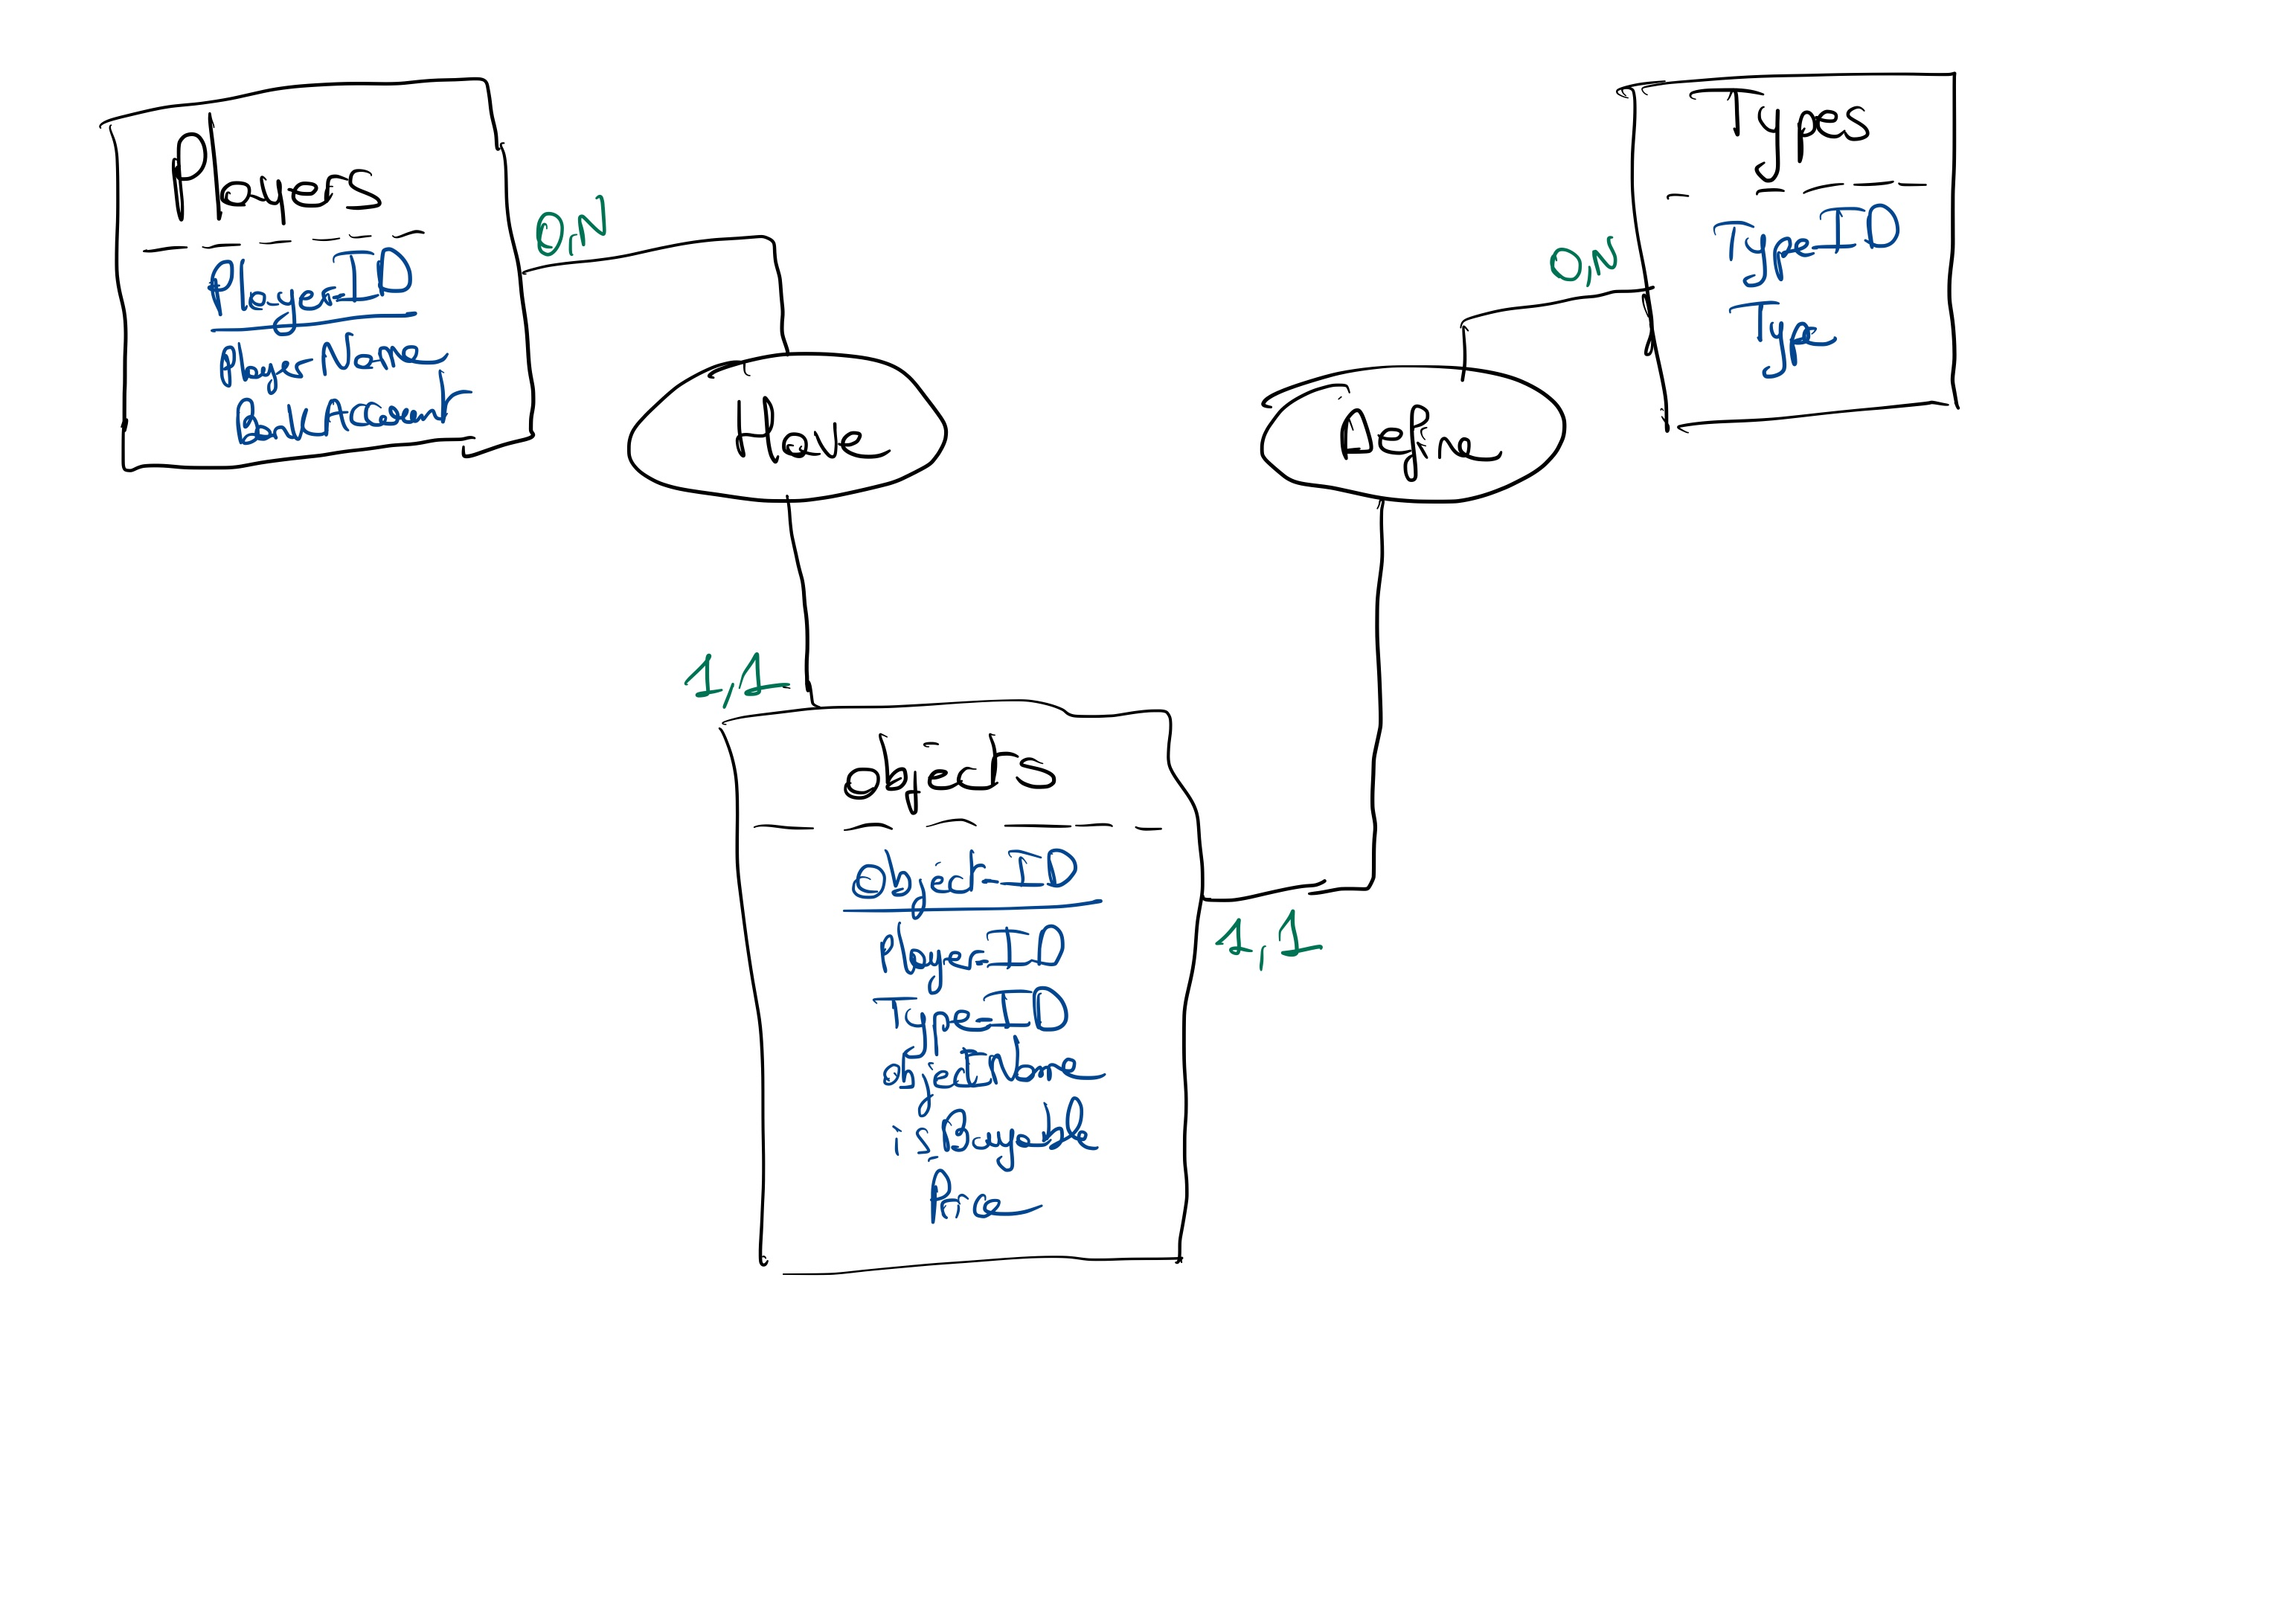

In [63]:
from IPython.display import Image
Image("picture.jpg")

To explain the cardinality :
A player can have 0 or more objects, but an object can only be possessed by one player.
Every single object has a unique type, but a type can be shared by multiple objects or none.

__3.2__ Deduce the relational scheme while precising the _primary_ and _foreign_ (if any) keys for each relation.